In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c
plt.style.use('huntstone')
import prop_plasma as pp;
import v_x_interp as vx;

In [3]:
beam_params = {
    'N'       : int(1e6),
    'beamE'   : 10e9, 
    'eps_n0'  : 3.0e-6,
    'beta0'   : [0.25, 0.25], 
    'alpha0'  : [0.00, 0.00],
    'rms_z'  : 0.00,
    'rms_gb0' : 0.01,
    'path'    : '/media/keenan/Data_Storage/WARGSim/',
    'B_mag'   : 5.00
}
plasma_params = {
    'n0'    : 0.34,
    'L_ft'  : 0.4,
    'hw_up' : 0.0,
    'shape' : 'Gauss'
}
my_ebeam = pp.init_beam(beam_params, plasma_params['n0'])
pwfa0    = pp.init_plasma(beam_params, plasma_params)

beta factor = 43.83
Bmag = 21.92
init eps_nx =  2.9989301259447887e-06
init eps_ny =  2.99899668461554e-06


In [4]:
name       = "500dumps/"
nDumps     = 500
dumpPeriod = int(len(pwfa0.dz) / nDumps)
res        = 1000
print(int(len(pwfa0.dz) / dumpPeriod))

500


In [4]:
pp.propagate(beam_params, plasma_params, dumpPeriod, name)

beta factor = 43.83
Bmag = 21.92
init eps_nx =  2.9924221041207963e-06
init eps_ny =  2.9996822898507847e-06


In [6]:
path   = "/media/keenan/Data_Storage/WARGSim/" + "1000dumps/"
nDumps = 1167
nParts = int(1e6)
dz     = pwfa0.dz[0]
z      = np.linspace(0, pwfa0.L, nDumps)
x      = np.zeros((nDumps))
#y      = np.zeros((nDumps))
#xp     = np.zeros((nDumps))
#yp     = np.zeros((nDumps))
gb     = np.zeros((nDumps))
t      = z / c;
t[0]   = 0;
for i in range(nDumps):
    if i%100 == 0 and i >=10:
        print(i)
    ptcls   = np.load(path + "_ptcls_" + str(i) + ".npy")
    x[i]  = ptcls[0,0]
    #xp[i] = ptcls[0, 1]
    #y[i]  = ptcls[0, 2]
    #yp[i] = ptcls[0, 3]
    gb[i] = ptcls[0, 5] 


100
200
300
400
500
600
700
800
900
1000
1100


In [7]:
x_test  = x
tau     = t / gb
tau_int = np.linspace(tau[0], tau[-1], 1000)
t_int   = np.linspace(t[0], t[-1], 1000)
x0n, x1n, x2n, x_int = vx.position_interp(x_test, tau, tau_int)

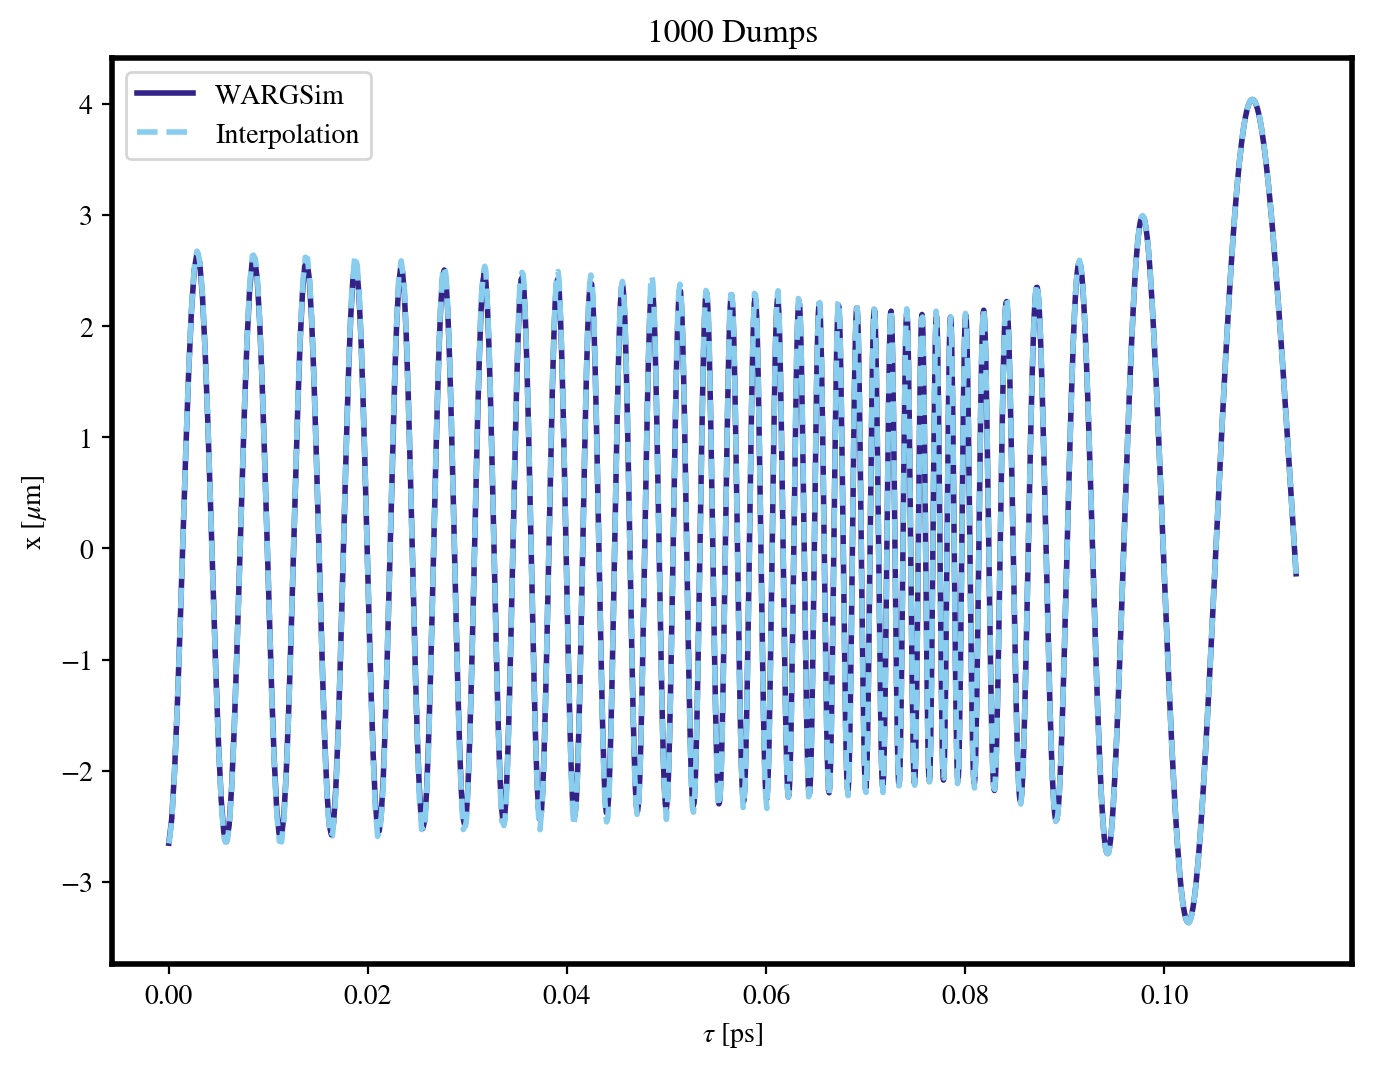

In [9]:
fig = plt.figure(figsize = (8,6), dpi = 200)
ax  = fig.gca()
ax.set_xlabel(r'$\tau$ [ps]')
ax.set_ylabel(r'x [$\mu$m]')
ax.set_title(str(1000) + ' Dumps')
plt.plot(tau*1e12, x_test * 1e6, label = 'WARGSim')
plt.plot(tau_int*1e12, x_int * 1e6, '--', label = 'Interpolation')
plt.legend()
plt.show()